In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\ML-Project\\notebook\\Data\\StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [8]:
df.isna().sum() # Checking missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
duplicates=df.duplicated().sum() # Checking Duplicates
duplicates

0

In [13]:
df.info() # Checking Dtypes and Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique() # Checking different categories in every columns

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
df.describe().T.style.background_gradient(cmap='coolwarm') # Checking statistics of dataset

,count,mean,std,min,25%,50%,75%,max
math score,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading score,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000
writing score,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000


In [31]:
# Checking the value types in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    num_unique_values = df[column].nunique()
    print(f"Categories in '{column}' variable= {unique_values}")
    print(f"Number of unique categories in '{column}'= {num_unique_values}\n")


Categories in 'gender' variable= ['female' 'male']
Number of unique categories in 'gender'= 2

Categories in 'race/ethnicity' variable= ['group B' 'group C' 'group A' 'group D' 'group E']
Number of unique categories in 'race/ethnicity'= 5

Categories in 'parental level of education' variable= ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Number of unique categories in 'parental level of education'= 6

Categories in 'lunch' variable= ['standard' 'free/reduced']
Number of unique categories in 'lunch'= 2

Categories in 'test preparation course' variable= ['none' 'completed']
Number of unique categories in 'test preparation course'= 2



In [30]:
## Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Get categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['math score', 'reading score', 'writing score']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
# Adding columns for Total Scores and Average Scores
# Feature Engineering

df['total_score']=df['math score']+df['reading score']+df['writing score'] # total score is the sum of all three subjects
df['avg_score']=df['total_score']/3 # average score is the total score divided by 3

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
reading_full_marks=df[df['reading score']==100]['avg_score'].count()
writing_full_marks=df[df['writing score']==100]['avg_score'].count()
math_full_marks=df[df['math score']==100]['avg_score'].count()

print(f'Number of students with full marks in maths {math_full_marks}')
print(f'Number of students with full marks in reading {reading_full_marks}')
print(f'Number of students with full marks in writing {writing_full_marks}')

Number of students with full marks in maths 7
Number of students with full marks in reading 17
Number of students with full marks in writing 14


In [38]:
reading_less_20=df[df['reading score']<=20]['avg_score'].count()
writing_less_20=df[df['writing score']<=20]['avg_score'].count()
math_less_20=df[df['math score']<=20]['avg_score'].count()

print(f'Number of Students who got below 20 in Reading, Writing and Math are {reading_less_20}, {writing_less_20} and {math_less_20} respectively. This means that {round((reading_less_20/1000)*100,2)}% of students got below 20 in reading, {round((writing_less_20/1000)*100,2)}% of students got below 20 in writing and {round((math_less_20/1000)*100,2)}% of students got below 20 in math. This is because the average score is 17.25 or 20')

Number of Students who got below 20 in Reading, Writing and Math are 1, 3 and 4 respectively. This means that 0.1% of students got below 20 in reading, 0.3% of students got below 20 in writing and 0.4% of students got below 20 in math. This is because the average score is 17.25 or 20


In [ ]:
# From the above statement we can see that there are more no.of students performing poorly in maths. 

<Axes: xlabel='avg_score', ylabel='Count'>

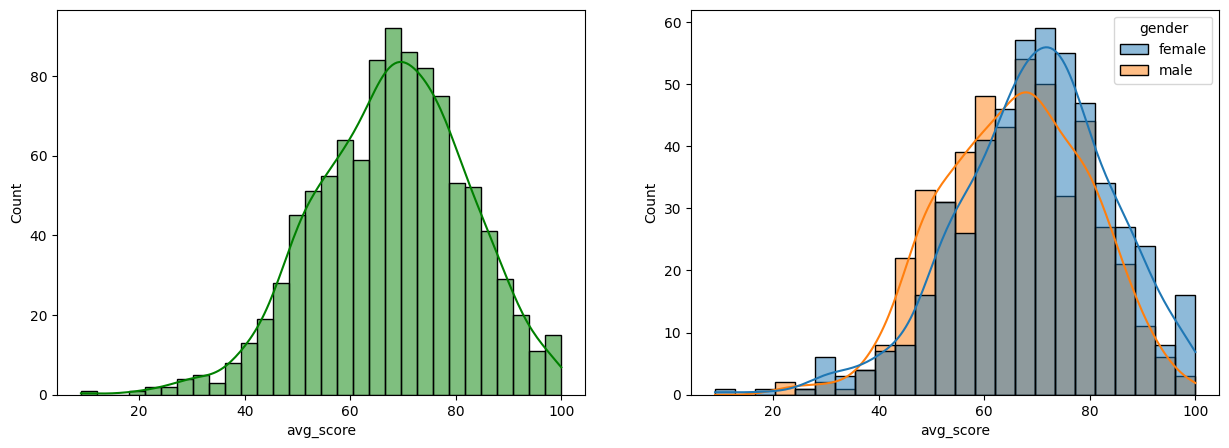

In [50]:
# EDA
# Creating Histogram for seeing the which gender getting good average scores

fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='avg_score', bins=30, kde=True,color='g')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='avg_score',kde=True,hue='gender')


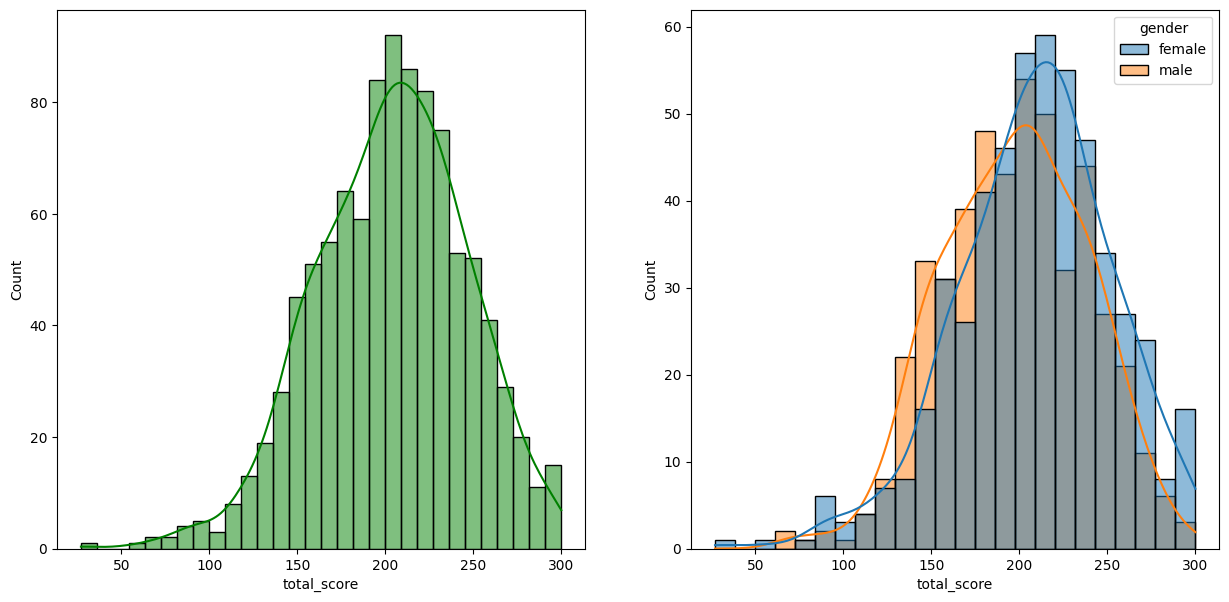

In [52]:
# Creating Histogram for seeing the which gender getting good average scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

# Female Students seems to perform well in scores..

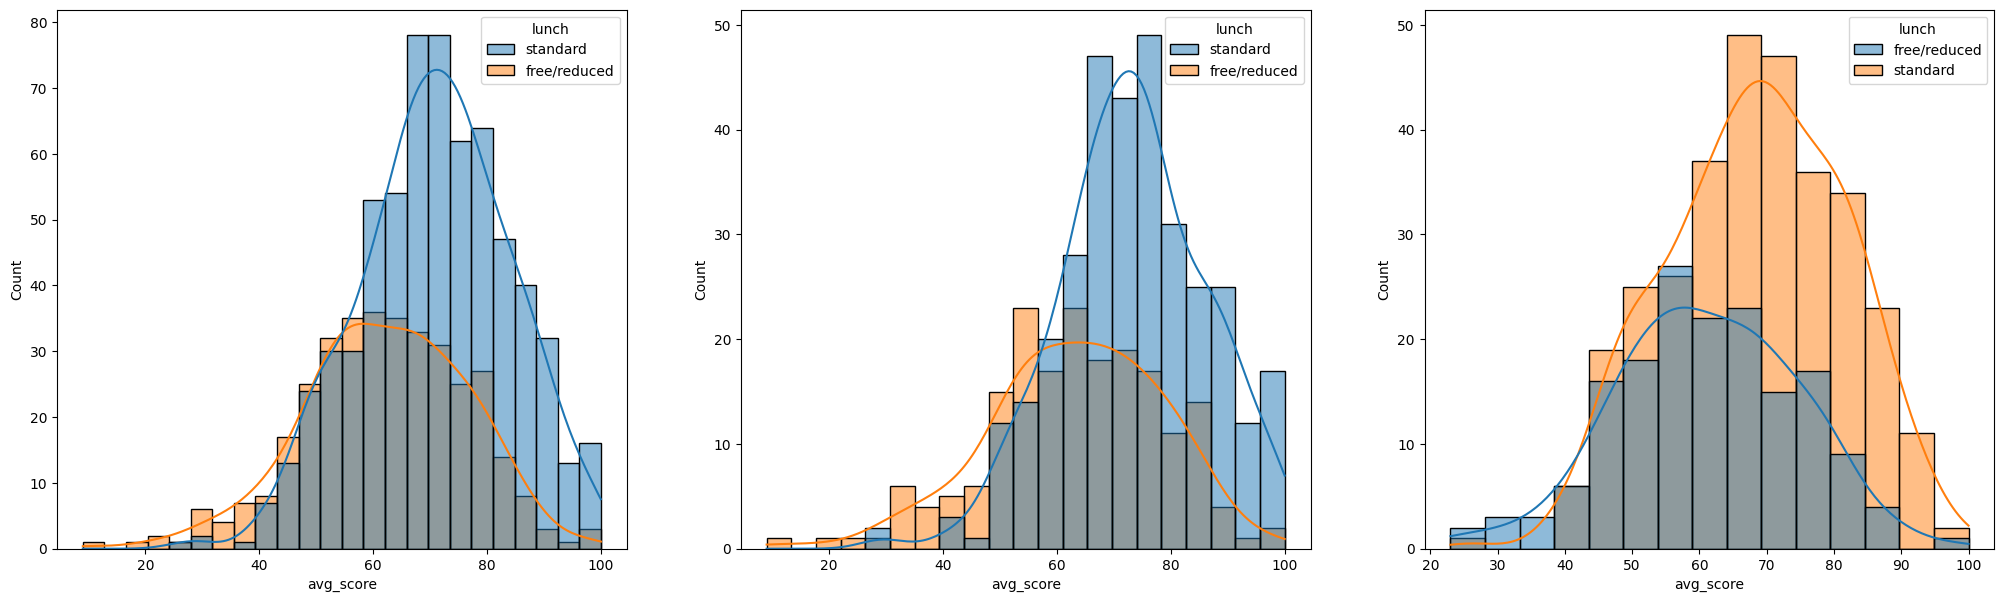

In [62]:
# Checking the avg scores with students having lunch or not
plt.subplots(1,3,figsize=(25,7))
plt.subplot(1, 3, 1)
sns.histplot(data=df,x="avg_score",kde=True,hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='avg_score', kde=True, hue='lunch')
plt.show()

Insights

1.Standard lunch helps perform well in exams.

2.Standard lunch helps perform well in exams be it a male or a female.

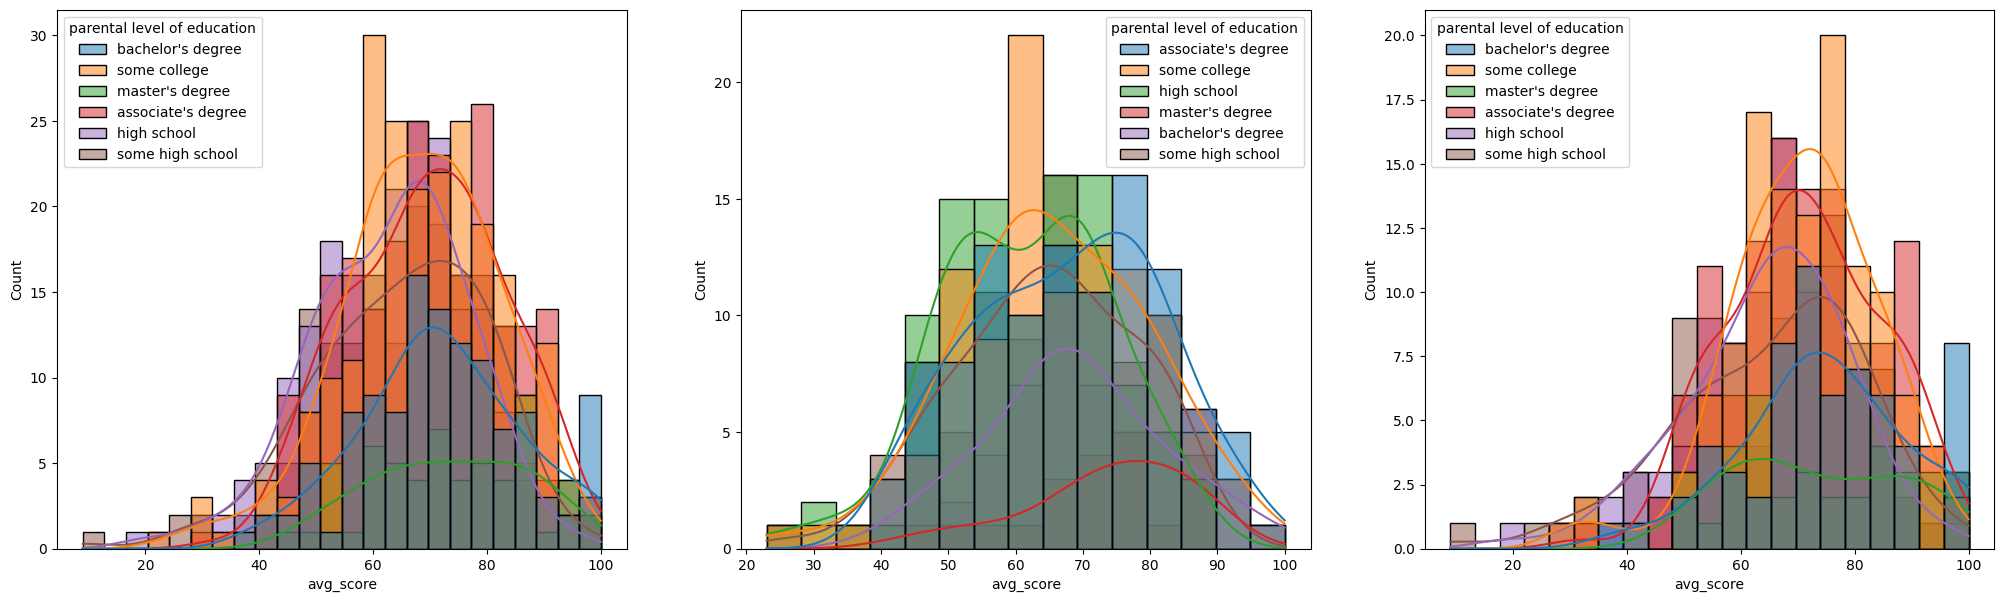

In [68]:
# How much parental education is supporting the students performance

plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental level of education')
plt.show()

Insights

1. In general parent's education don't help student perform well in exam.

2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

3. 3rd plot we can see there is no effect of parent's education on female students.

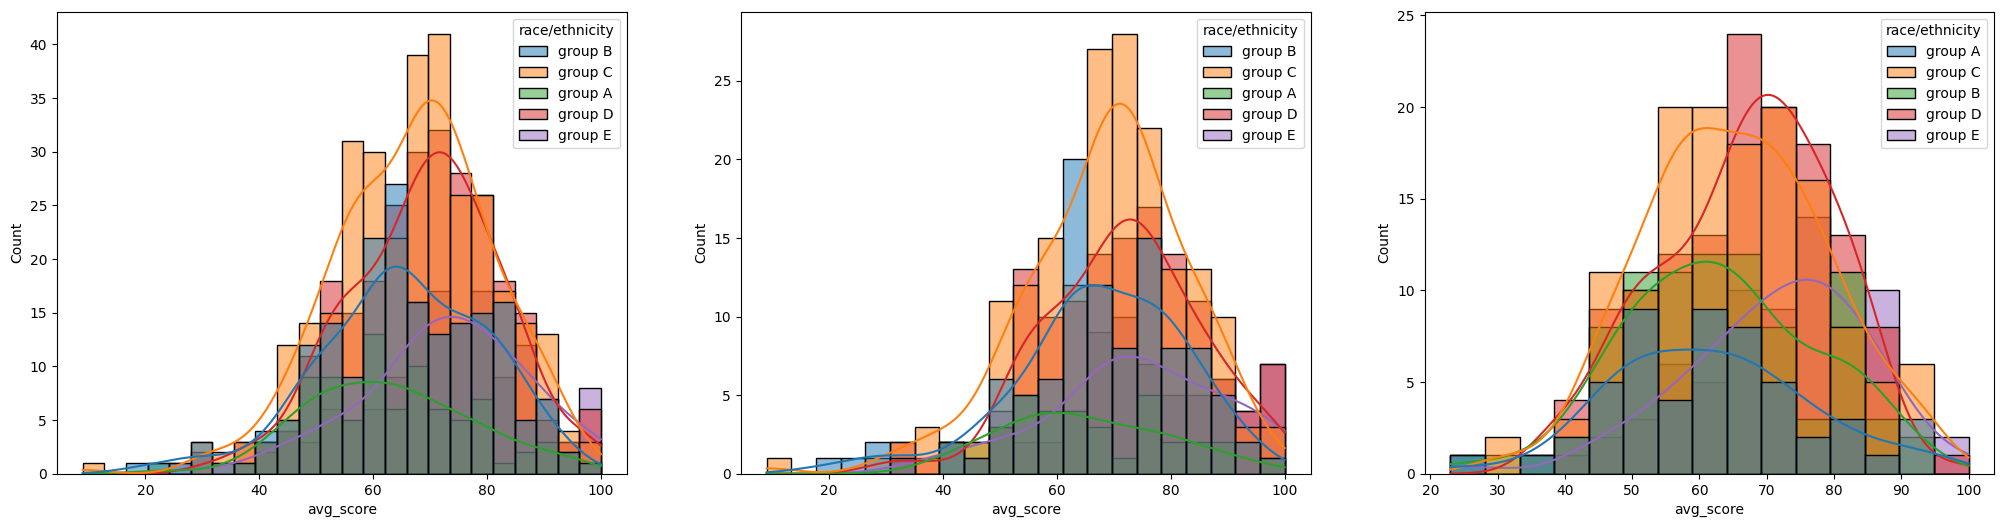

In [69]:
# race/ethnicity affecting students performance

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.show()

Insights

1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.
3. Students from Group E is overall performing well in general and in female gender.For males, race/ethnicity is
not playing a imp role.

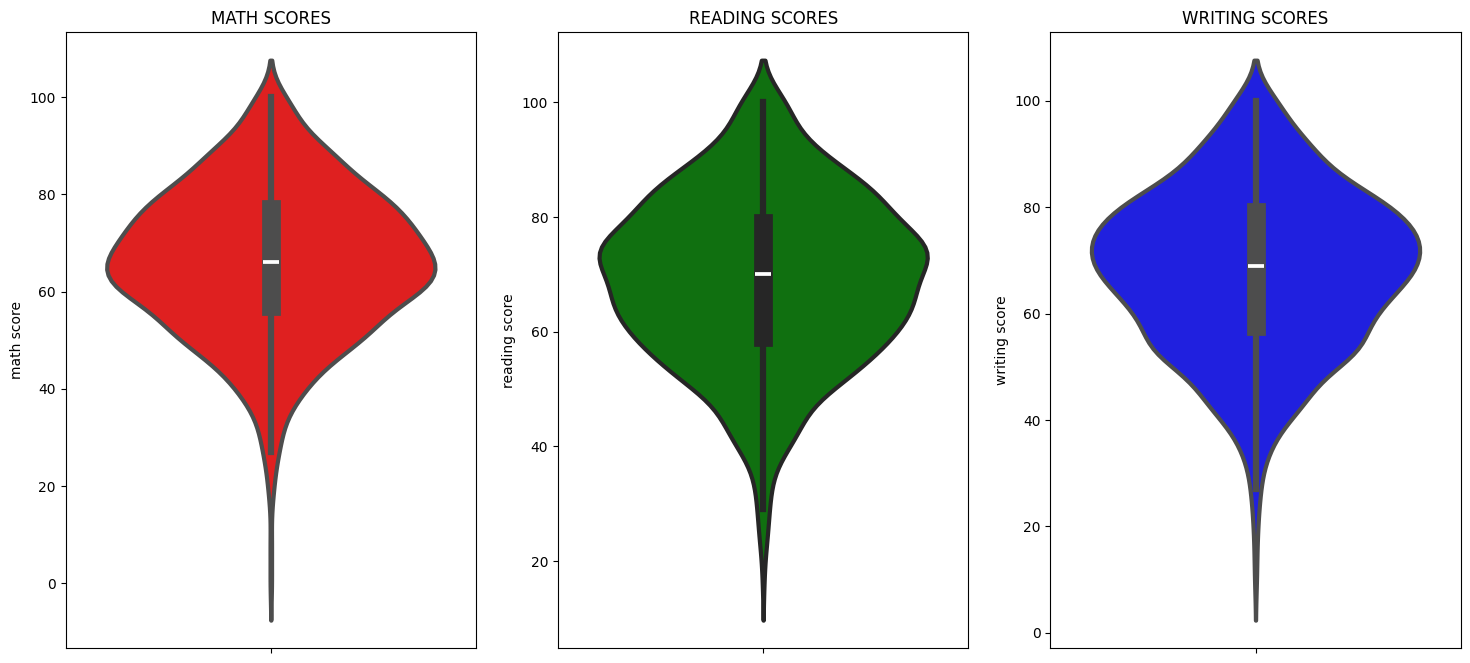

In [71]:
# Maximumum score range of students in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

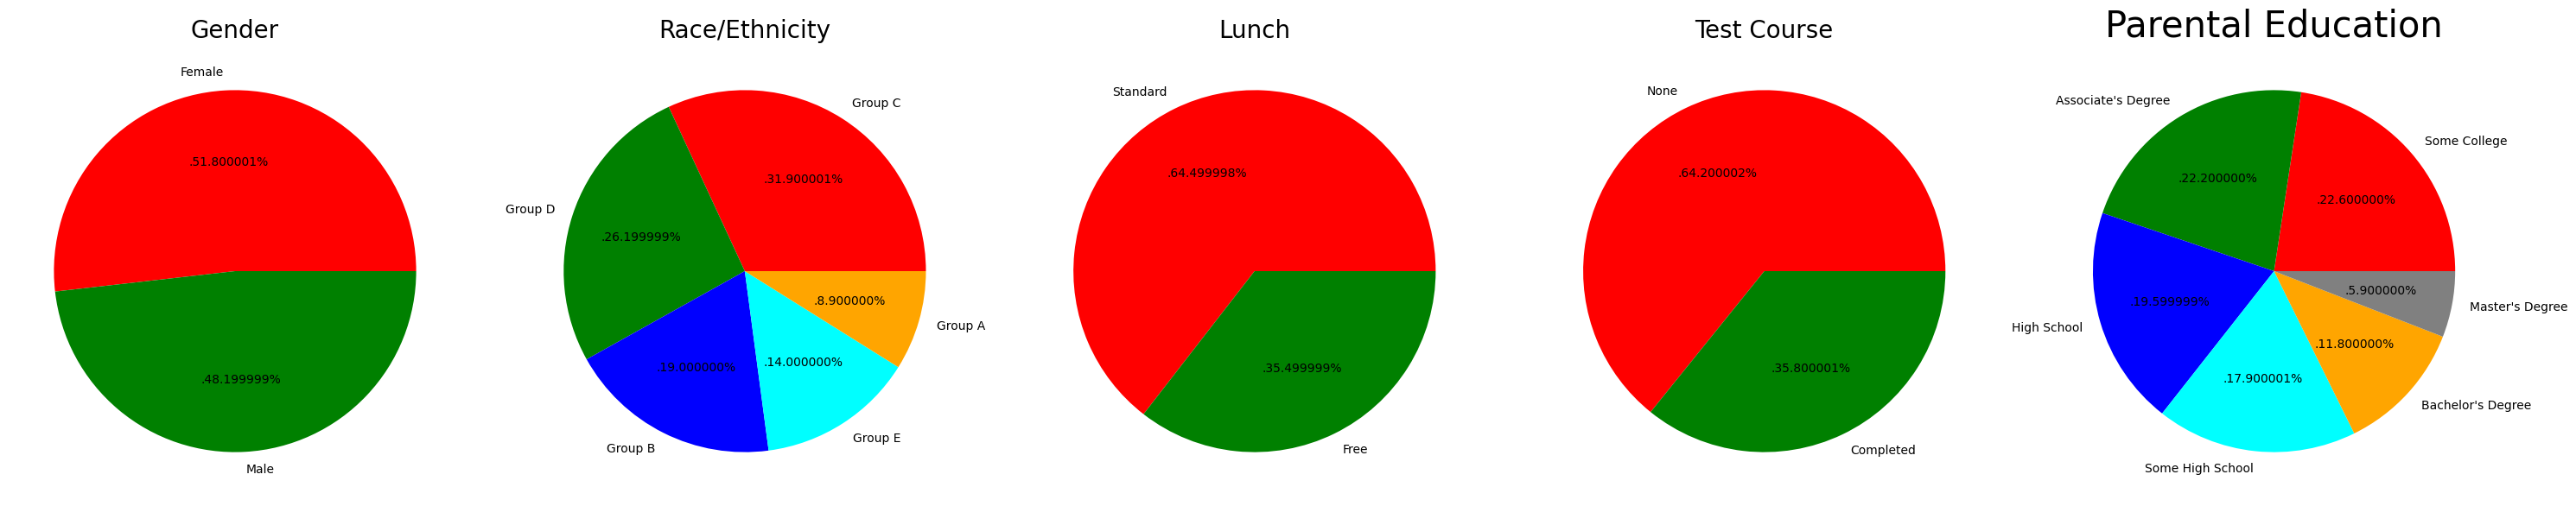

In [73]:
# Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [76]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Group by 'gender' and calculate the mean for numeric columns only
gender_group = numeric_df.groupby(df['gender']).mean()

print(gender_group)


        math score  reading score  writing score  total_score  avg_score
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


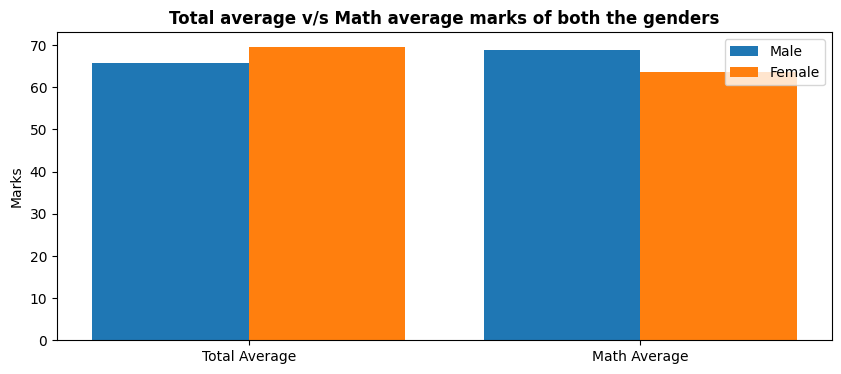

In [79]:
plt.figure(figsize=(10, 4))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

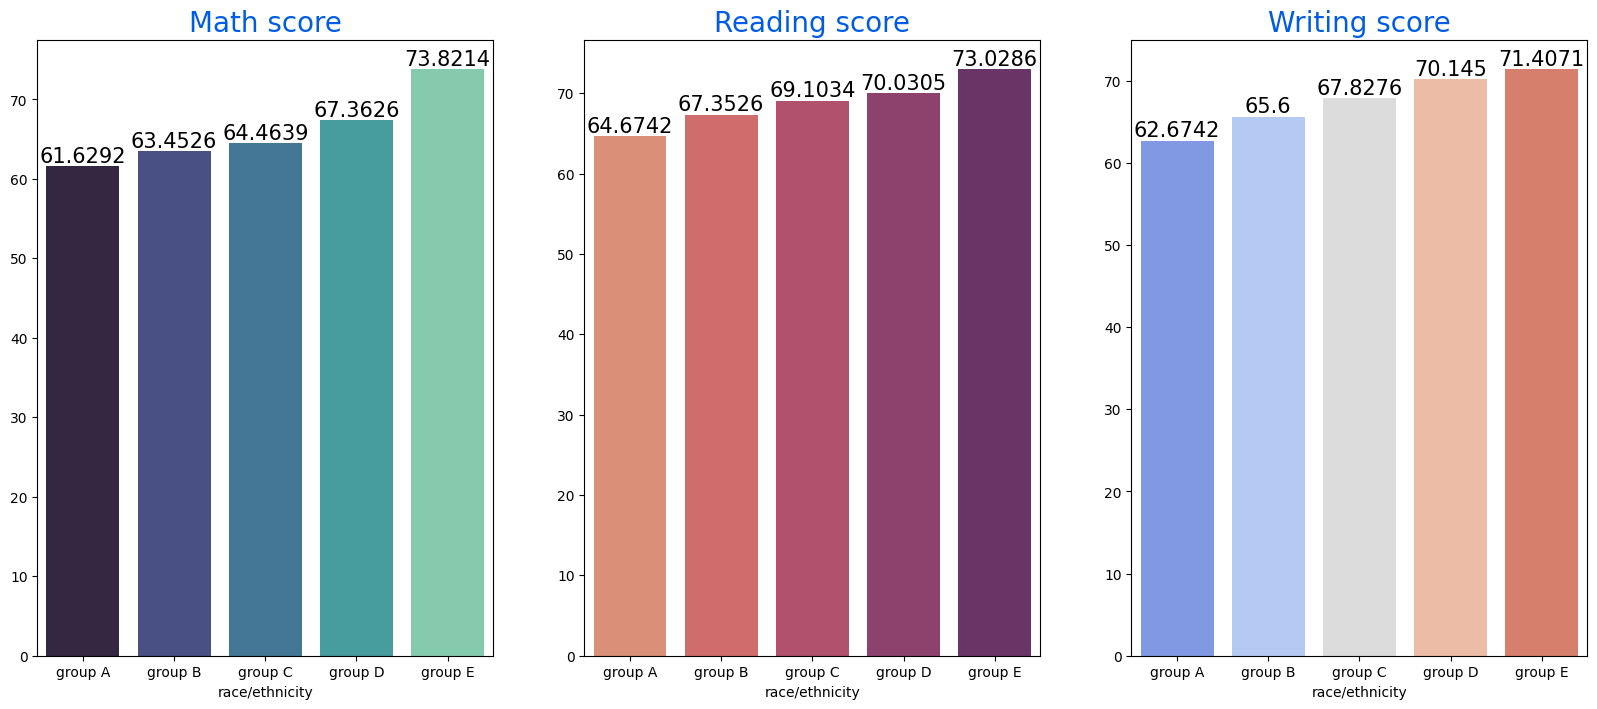

In [81]:
# BIVARIATE ANALYSIS ( Race/Ehnicity distributions on student's performance ? )

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

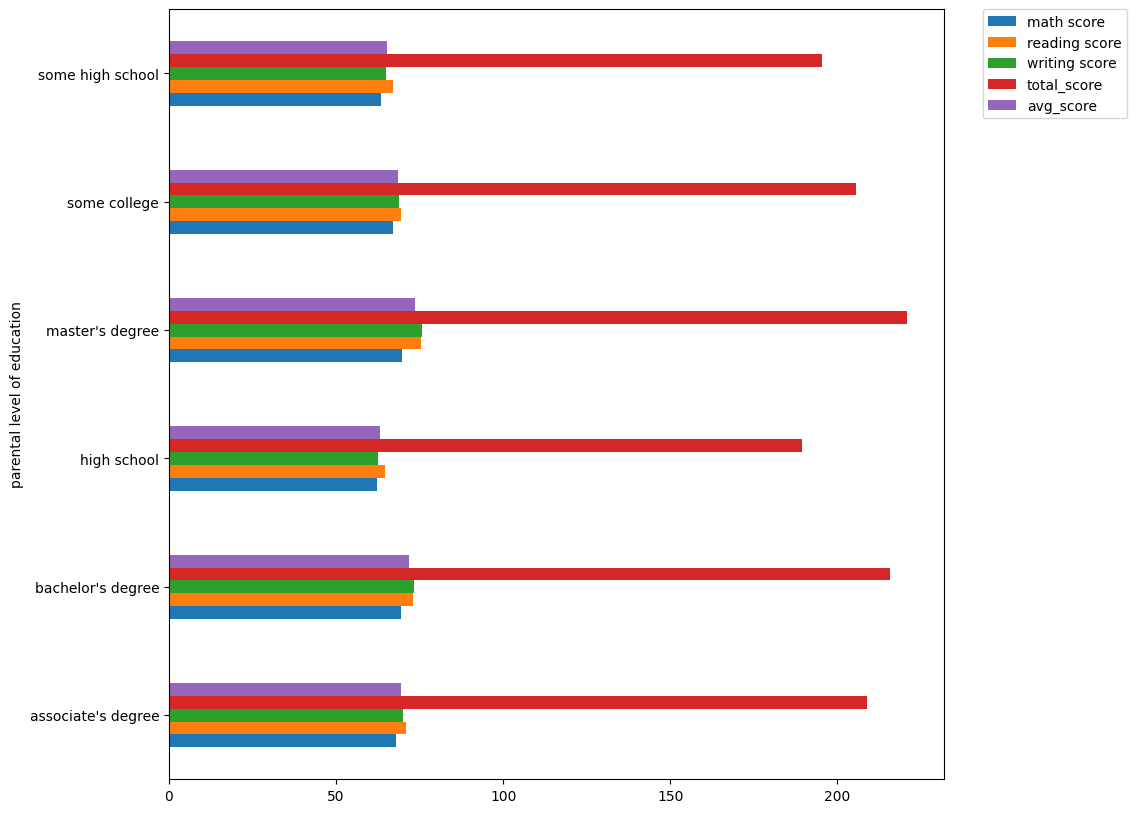

In [84]:
# BIVARIATE ANALYSIS ( parental education distribution on student's performance ? )
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Group by 'parental level of education' and calculate the mean for numeric columns
parental_education_group = numeric_columns.groupby(df['parental level of education']).mean()

# Plot the result as a horizontal bar chart
parental_education_group.plot(kind='barh', figsize=(10, 10))

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()


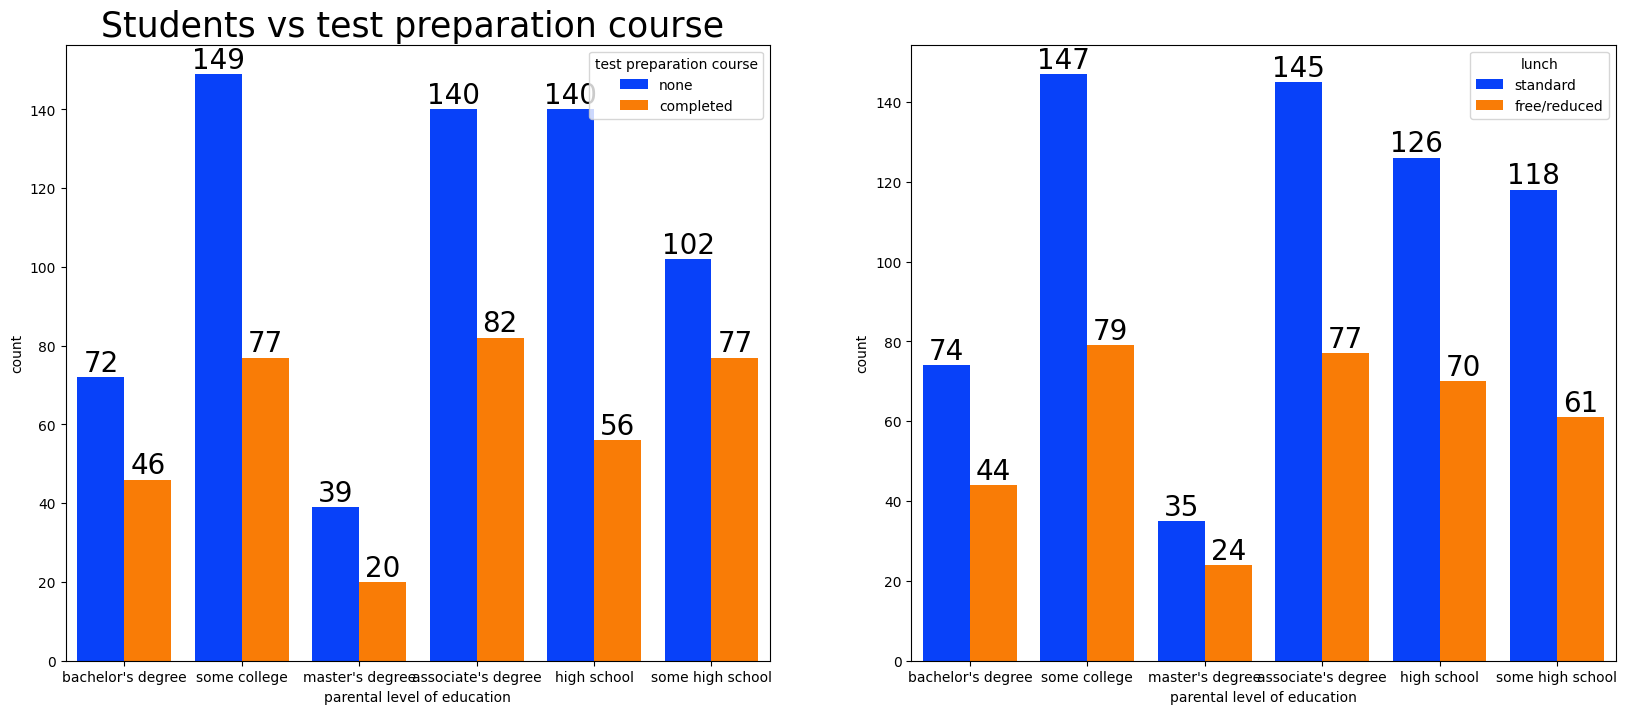

In [85]:
# BIVARIATE ANALYSIS ( Lunch distribution on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

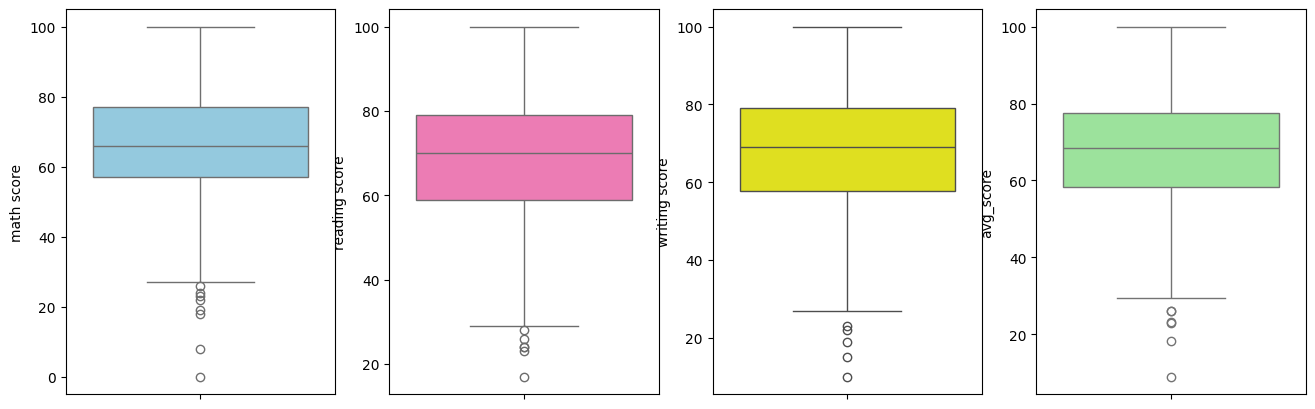

In [86]:
# CHECKING OUTLIERS
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

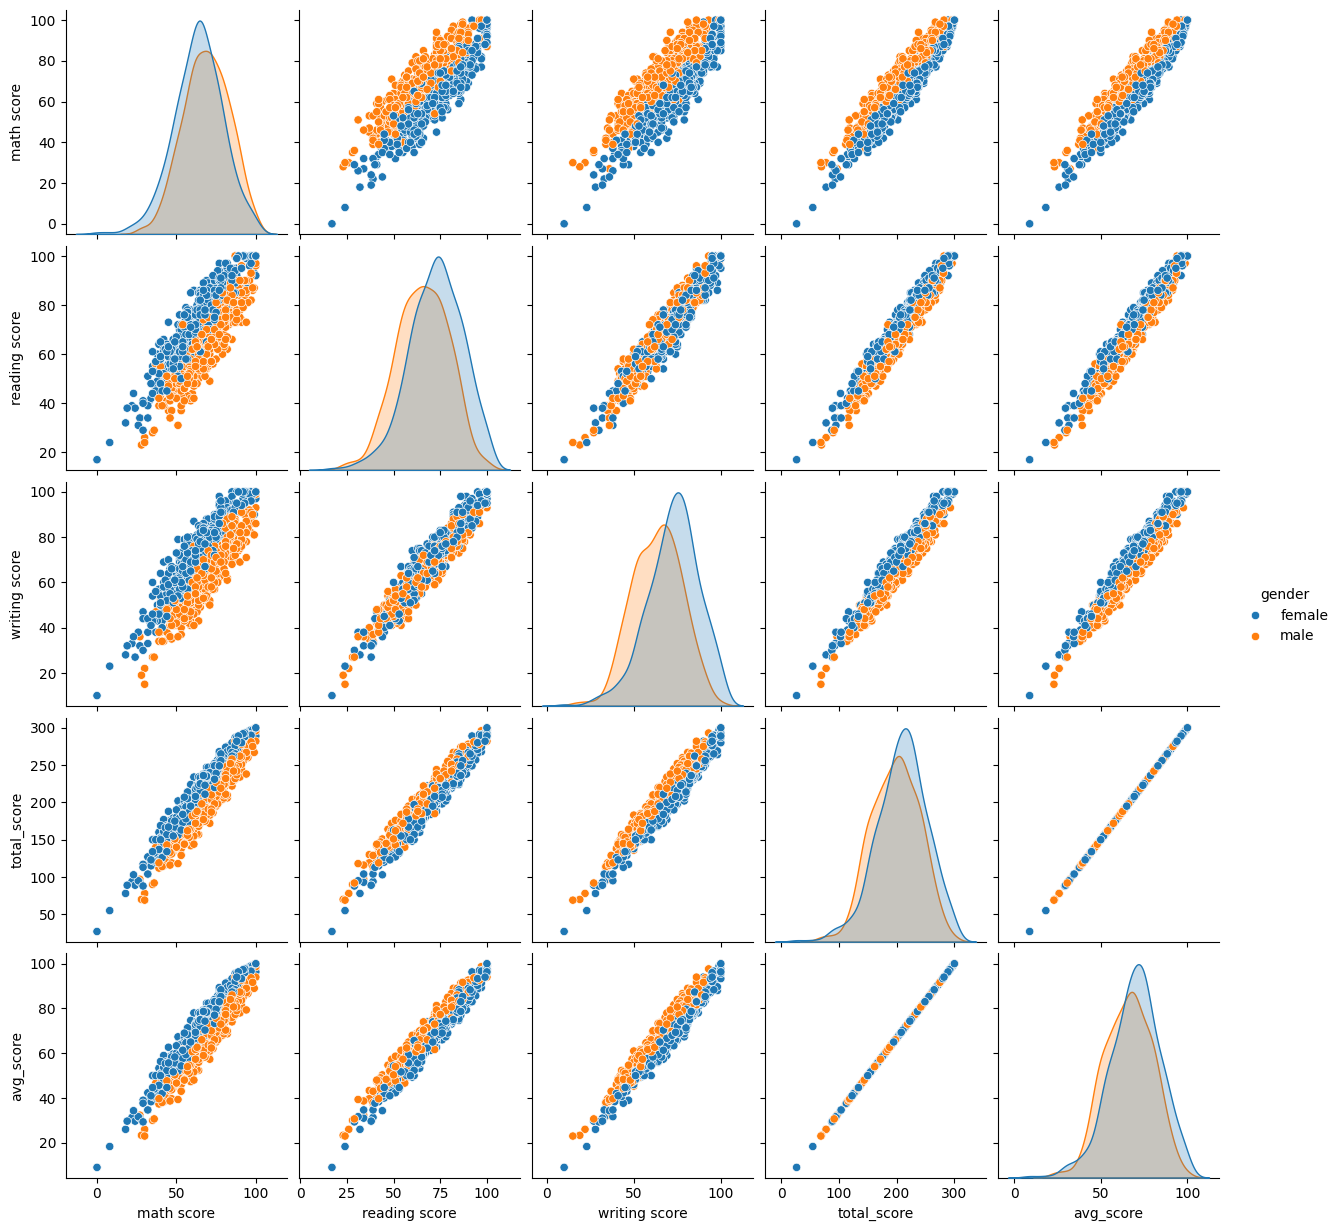

In [87]:
#  MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()

Conclusions

1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.